# Taher Muhammedali - 0478012

## Assignment 1 - Task 4 - Data Science ESM

### (a)

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import geopandas as gpd
import cartopy
import cartopy.crs as ccrs
import numpy as np
import rasterio
import atlite
from rasterio.plot import show
from atlite.gis import ExclusionContainer
from atlite.gis import shape_availability
import warnings
warnings.filterwarnings('ignore')

### (b)

In [2]:
# Created CSV file of Corine table and importing 

In [3]:
csv = 'https://drive.google.com/uc?export=download&id=1NVBJqi9785D-RtzSwRyzmEJUPYaPPPyF' # Please let me know if the CSV file doesnt read. I'll try to upload the CSV as well on isis if possible
corine = pd.read_csv(csv)
corine.head(5)

,Value,Label,Description,Inclusion/Exclusion
0,1,111,Continuous urban fabric,Exclusion - 1200m
1,2,112,Discontinuous urban fabric,Exclusion - 1200m
2,3,121,Industrial or commercial units,Exclusion - 1200m
3,4,122,Road and rail networks and associated land,Exclusion - 1200m
4,5,123,Port areas,Exclusion - 1200m


### (c)

In [4]:
# Creating a Geodataframe, converting to CRS3035 and filtering to Luxembrog

In [5]:
url = "https://tubcloud.tu-berlin.de/s/7bpHrAkjMT3ADSr/download/country_shapes.geojson"
countries = gpd.read_file(url).set_index('name')
excluder = ExclusionContainer(crs=3035)
luxgeo = countries.to_crs(excluder.crs).loc[["LU"]].geometry
luxgeo

name
LU    POLYGON ((4043458.177 3008253.833, 4042879.385...
Name: geometry, dtype: geometry

### (d)

In [6]:
# Creating an Excluder for each constraint individually and plotting for the geometry of Luxembourg
# Calculating the area Excluded for each constraint
# Repeating the same for 4 Geometries and 2 Rasters

Excluded area for Exclusion 1 is 24.19 %


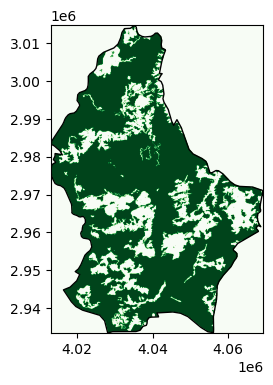

In [38]:
# Exclusion 1
shape = luxgeo

excluder = ExclusionContainer(crs=3035)
excluder.add_geometry('https://tubcloud.tu-berlin.de/s/zPMqJFPD8tKq2Ss/download/Natura2000_end2021-LU.gpkg')

band, transform = shape_availability(shape, excluder)

fig, ax = plt.subplots(figsize=(4,4))
shape.plot(ax=ax, color='none')
show(band, transform=transform, cmap='Greens', ax=ax)

# Calculating Excluded area %
eligible_cells = band.sum()
eligible_cells = np.int64(eligible_cells) #Doing this to prevent negatives affecting eligible_cells value
cell_area = excluder.res**2
eligible_area = cell_area * eligible_cells
country_area = shape.geometry.area[0]
ineligible_area1 = ((country_area - eligible_area)/country_area)*100
print("Excluded area for Exclusion 1 is",round(ineligible_area1,2),"%")

In [39]:
shape.geometry.area[0]

2608468800.011305

Excluded area for Exclusion 2 is 51.68 %


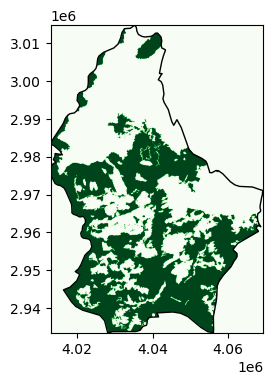

In [8]:
# Exclusion 2
shape = luxgeo

excluder = ExclusionContainer(crs=3035)
excluder.add_geometry('https://tubcloud.tu-berlin.de/s/fZfFMim8MYNTsgA/download/CDDA_2022_v01_public-LU.gpkg')

band, transform = shape_availability(shape, excluder)

fig, ax = plt.subplots(figsize=(4,4))
shape.plot(ax=ax, color='none')
show(band, transform=transform, cmap='Greens', ax=ax)

# Calculating Excluded area %
eligible_cells = band.sum()
eligible_cells = np.int64(eligible_cells) #Doing this to prevent negatives affecting eligible_cells value
cell_area = excluder.res**2
eligible_area = cell_area * eligible_cells
country_area = shape.geometry.area[0]
ineligible_area2 = ((country_area - eligible_area)/country_area)*100
print("Excluded area for Exclusion 2 is",round(ineligible_area2,2),"%")

Excluded area for Exclusion 3 is 0.0145 %


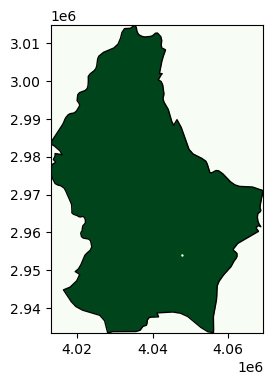

In [37]:
# Exclusion 3
shape = luxgeo

excluder = ExclusionContainer(crs=3035)
excluder.add_geometry('https://tubcloud.tu-berlin.de/s/TbEJ9Lsy9EpTcQS/download/ne_10m_airports.gpkg', buffer = 300)

band, transform = shape_availability(shape, excluder)

fig, ax = plt.subplots(figsize=(4,4))
shape.plot(ax=ax, color='none')
show(band, transform=transform, cmap='Greens', ax=ax)

# Calculating Excluded area %
eligible_cells = band.sum()
eligible_cells = np.int64(eligible_cells) #Doing this to prevent negatives affecting eligible_cells value
cell_area = excluder.res**2
eligible_area = cell_area * eligible_cells
country_area = shape.geometry.area[0]
ineligible_area3 = ((country_area - eligible_area)/country_area)*100
print("Excluded area for Exclusion 3 is",round(ineligible_area3,4),"%")

Excluded area for Exclusion 4 is 0.8414 %


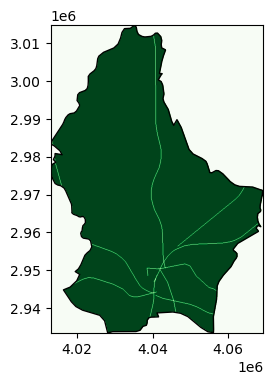

In [35]:
# Exclusion 4
shape = luxgeo

excluder = ExclusionContainer(crs=3035)
excluder.add_geometry('https://tubcloud.tu-berlin.de/s/zcKQ95TgpyMJb8E/download/ne_10m_roads.gpkg')

band, transform = shape_availability(shape, excluder)

fig, ax = plt.subplots(figsize=(4,4))
shape.plot(ax=ax, color='none')
show(band, transform=transform, cmap='Greens', ax=ax)

# Calculating Excluded area %
eligible_cells = band.sum()
eligible_cells = np.int64(eligible_cells) #Doing this to prevent negatives affecting eligible_cells value
cell_area = excluder.res**2
eligible_area = cell_area * eligible_cells
country_area = shape.geometry.area[0]
ineligible_area4 = ((country_area - eligible_area)/country_area)*100
print("Excluded area for Exclusion 4 is",round(ineligible_area4,4),"%")

In [11]:
ab = 'https://tubcloud.tu-berlin.de/s/z7aY8HNCdETQMT7/download/U2018_CLC2018_V2020_20u1-LU.tif' # Importing tif for Exclusion 5 & 6

Excluded area for Exclusion 5 is 68.1 %


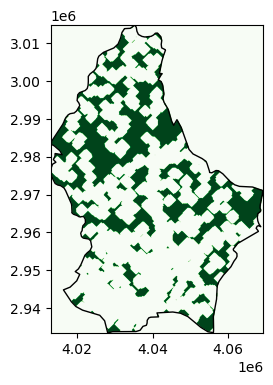

In [12]:
# Exclusion 5

# For loop to check corine codes and get the tif value from the csv file imported earlier

xy = [111, 112, 121, 122, 123, 124]
excodes = []
for x in xy:
    z = corine.loc[corine['Label'] == x, 'Value']
    excodes.append(z)

shape = luxgeo

excluder = ExclusionContainer(crs=3035)
excluder.add_raster(ab, codes=excodes, buffer=1200, crs=3035)

band, transform = shape_availability(shape, excluder)

fig, ax = plt.subplots(figsize=(4,4))
shape.plot(ax=ax, color='none')
show(band, transform=transform, cmap='Greens', ax=ax)

# Calculating Excluded area %
eligible_cells = band.sum()
eligible_cells = np.int64(eligible_cells) #Doing this to prevent negatives affecting eligible_cells value
cell_area = excluder.res**2
eligible_area = cell_area * eligible_cells
country_area = shape.geometry.area[0]
ineligible_area5 = ((country_area - eligible_area)/country_area)*100
print("Excluded area for Exclusion 5 is",round(ineligible_area5,2),"%")

Excluded area for Exclusion 6 is 47.11 %


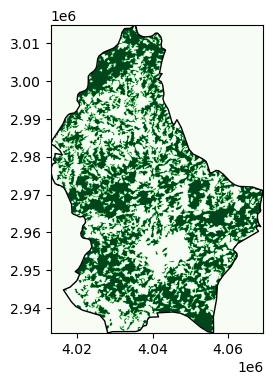

In [13]:
# Exclusion 6 (Inclusion)

yz = [211, 212, 213, 231, 241, 242, 243, 321, 323, 324, 333]
incodes = []
for x in yz:
    z = corine.loc[corine['Label'] == x, 'Value']
    incodes.append(z)

shape = luxgeo

excluder = ExclusionContainer(crs=3035)
excluder.add_raster(ab, codes=incodes, crs=3035, invert=True)

band, transform = shape_availability(shape, excluder)

fig, ax = plt.subplots(figsize=(4,4))
shape.plot(ax=ax, color='none')
show(band, transform=transform, cmap='Greens', ax=ax)

# Calculating Excluded area %
eligible_cells = band.sum()
eligible_cells = np.int64(eligible_cells) #Doing this to prevent negatives affecting eligible_cells value
cell_area = excluder.res**2
eligible_area = cell_area * eligible_cells
country_area = shape.geometry.area[0]
ineligible_area6 = ((country_area - eligible_area)/country_area)*100
print("Excluded area for Exclusion 6 is",round(ineligible_area6,2),"%")

### (e)

In [14]:
# Combining all 6 Exclusions and plotting together
# Calculating remaining area available after considering all exclusions

In [15]:
# Exclusions All 6

shape = luxgeo

excluder = ExclusionContainer(crs=3035)
excluder.add_geometry('https://tubcloud.tu-berlin.de/s/zPMqJFPD8tKq2Ss/download/Natura2000_end2021-LU.gpkg')
excluder.add_geometry('https://tubcloud.tu-berlin.de/s/fZfFMim8MYNTsgA/download/CDDA_2022_v01_public-LU.gpkg')
excluder.add_geometry('https://tubcloud.tu-berlin.de/s/TbEJ9Lsy9EpTcQS/download/ne_10m_airports.gpkg')
excluder.add_geometry('https://tubcloud.tu-berlin.de/s/zcKQ95TgpyMJb8E/download/ne_10m_roads.gpkg')
excluder.add_raster(ab, codes=excodes, buffer=1200, crs=3035) # excodes was defined earlier
excluder.add_raster(ab, codes=incodes, crs=3035, invert=True) # incodes was defined earlier

Eligible area after considering all 6 exclusions is 5.93 %


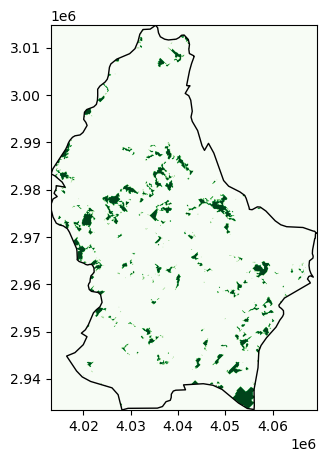

In [16]:
band, transform = shape_availability(shape, excluder)

fig, ax = plt.subplots(figsize=(5,5))
shape.plot(ax=ax, color='none')
show(band, transform=transform, cmap='Greens', ax=ax)

# Calculating Eligible area %
eligible_cells = band.sum()
eligible_cells = np.int64(eligible_cells) #Doing this to prevent negatives affecting eligible_cells value
cell_area = excluder.res**2
eligible_area = cell_area * eligible_cells
country_area = shape.geometry.area[0]
eligible_area_all6 = eligible_area / country_area * 100
print("Eligible area after considering all 6 exclusions is",round(eligible_area_all6,2),"%")

### (f)

In [17]:
# We can see below that the total of excluded area from task (d) is not equal to the total excluded area from task (e)
# This is because when exclusions are combined, overlapping exclusions are only accounted once.
# Whereas when we considering each exclusion individually and then add their areas, we will be counting many areas multiple times thus producing an incorrect figure.

In [18]:
total_ineligible = ((ineligible_area1+ineligible_area2+ineligible_area3+ineligible_area4+ineligible_area5)*country_area)/100
total_ineligibleall6 = country_area - eligible_area
total_ineligibleall6 == total_ineligible

False

### (g)

In [19]:
# Redoing Exclusion 5 with different buffer distances using a for loop iteration and then plotting

In [20]:
xy = [111, 112, 121, 122, 123, 124]
excodes = []
for x in xy:
    z = corine.loc[corine['Label'] == x, 'Value']
    excodes.append(z)

In [21]:
buffer = [0, 200, 400, 600, 800, 1000, 1200]
eligible_area_buffer = []
for x in buffer:
    shape = luxgeo

    excluder = ExclusionContainer(crs=3035)
    excluder.add_geometry('https://tubcloud.tu-berlin.de/s/zPMqJFPD8tKq2Ss/download/Natura2000_end2021-LU.gpkg')
    excluder.add_geometry('https://tubcloud.tu-berlin.de/s/fZfFMim8MYNTsgA/download/CDDA_2022_v01_public-LU.gpkg')
    excluder.add_geometry('https://tubcloud.tu-berlin.de/s/TbEJ9Lsy9EpTcQS/download/ne_10m_airports.gpkg')
    excluder.add_geometry('https://tubcloud.tu-berlin.de/s/zcKQ95TgpyMJb8E/download/ne_10m_roads.gpkg')
    excluder.add_raster(ab, codes=excodes, buffer=x, crs=3035) #
    excluder.add_raster(ab, codes=incodes, crs=3035, invert=True) # incodes was defined earlier

    band, transform = shape_availability(shape, excluder)
    eligible_cells = band.sum()
    eligible_cells = np.int64(eligible_cells)
    cell_area = excluder.res**2
    eligible_area = cell_area * eligible_cells
    eligible_area_buffer.append(eligible_area)

Text(0.5, 1.0, 'Sensitivity Analysis of change in Buffer area')

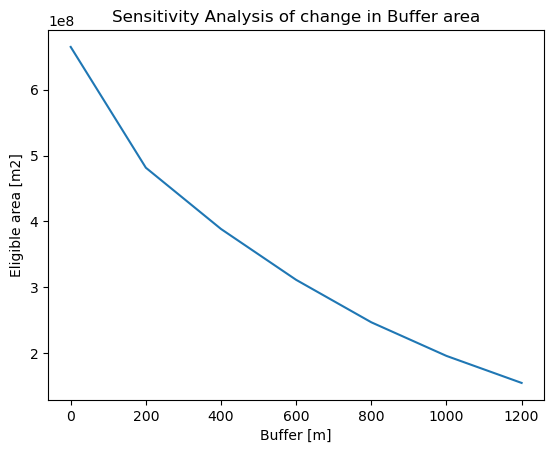

In [22]:
plt.plot(buffer, eligible_area_buffer)
plt.xlabel("Buffer [m]")
plt.ylabel("Eligible area [m2]")
plt.title("Sensitivity Analysis of change in Buffer area")

In [23]:
# From the linear characteristic of the plot we can see the more we increase the buffer from exclusion zones,
# the lesser area we will have available for wind parks.

### (h)

In [24]:
# Here we will find the area calulcated for 800m buffer + other constraints in above step.
# Then we calculate the total power produced throughout the year for a wind park with the given capacity density & factor 

In [25]:
area800 = eligible_area_buffer[4]/1e6 # Eligible area at 800m in km^2

In [26]:
capfactor = 33/100 #Percent
capdensity = 2 #MW/km^2
totalenergy = ((area800 * capfactor * capdensity * 365 * 24)/ 1e6) # Calculating TWh for full year 365 days, 24 hours
print("Total energy in Luxembourg produced from this wind power at 800m buffer will be %.2f TWh/year" % totalenergy)

Total energy in Luxembourg produced from this wind power at 800m buffer will be 1.43 TWh/year
